<a href="https://colab.research.google.com/github/syejin2004/2024-1-my-BDA/blob/main/inclass/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B3%BC%EC%A0%9C_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
2.0.3
1.25.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 18.8 MB/s eta 0:00:00


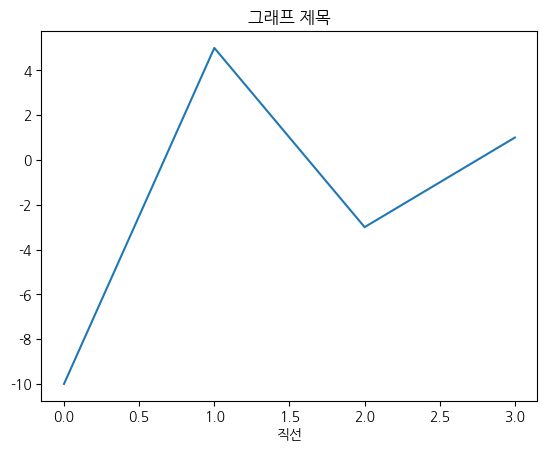

In [1]:
import sys
import pandas as pd
import numpy as np

print(sys.version)
print(pd.__version__)
print(np.__version__)

!pip install koreanize_matplotlib

%config inlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot([-10, 5, -3, 1])
plt.title('그래프 제목')
plt.xlabel('직선')
plt.show()

In [2]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


#### 등급별 deck 카운트

<Axes: xlabel='pclass', ylabel='count'>

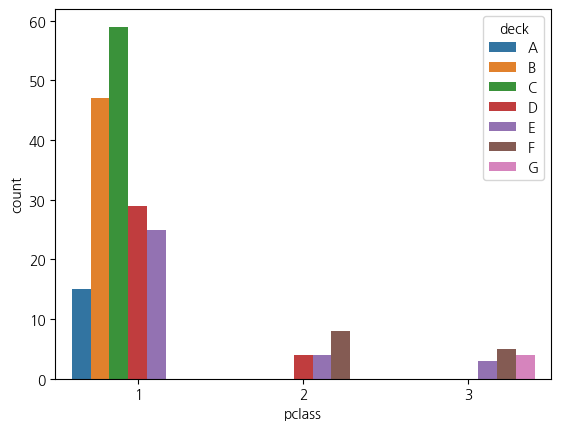

In [4]:
sns.countplot(titanic, x='pclass', hue='deck')

In [52]:
import pandas as pd
import seaborn as sns

# 타이타닉 데이터셋 로드
titanic = sns.load_dataset('titanic')

# 등급별로 deck을 카운트
deck_counts_by_class = titanic.groupby('pclass')['deck'].value_counts().unstack(fill_value=0)

# 결과 출력
display(deck_counts_by_class)


deck,A,B,C,D,E,F,G
pclass,,,,,,,
1,15,47,59,29,25,0,0
2,0,0,0,4,4,8,0
3,0,0,0,0,3,5,4


#### pclass에 따른 생존 & 사망한 사람의 수

In [57]:
titanic_subset = titanic[['pclass', 'deck', 'alive']]

titanic_subset['alive'] = titanic_subset['alive'].map({'yes':1, 'no':0})
survivor_counts = titanic_subset.groupby(['pclass', 'deck']).agg(survivor_count=('alive', 'sum')).reset_index()
survivor_table = survivor_counts.pivot(index='deck', columns='pclass', values='survivor_count')
print("생존자 수:")
print(survivor_table)

생존자 수:
pclass   1  2  3
deck            
A        7  0  0
B       35  0  0
C       35  0  0
D       22  3  0
E       18  3  3
F        0  7  1
G        0  0  2


<ipython-input-57-3632722e7a29>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_subset['alive'] = titanic_subset['alive'].map({'yes':1, 'no':0})


In [54]:
# 타이타닉 데이터셋 불러오기
titanic = sns.load_dataset('titanic')

# 필요한 열들만 선택하기
titanic_subset = titanic[['pclass', 'deck', 'alive']]

# 생존 여부를 숫자로 변환 (yes -> 1, no -> 0)
titanic_subset['alive'] = titanic_subset['alive'].map({'yes': 1, 'no': 0})

# 그룹화하여 사망자 수 계산
death_counts = titanic_subset.groupby(['pclass', 'deck']).agg(death_count=('alive', lambda x: (x == 0).sum())).reset_index()

# 생존자 수 계산
death_counts['survivor_count'] = 0

# 결과 출력
death_table = death_counts.pivot(index='deck', columns='pclass', values='death_count').fillna(0).astype(int)

print("사망자 수:")
print(death_table)

사망자 수:
pclass   1  2  3
deck            
A        8  0  0
B       12  0  0
C       24  0  0
D        7  1  0
E        7  1  0
F        0  1  4
G        0  0  2


<ipython-input-54-692ece85844e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_subset['alive'] = titanic_subset['alive'].map({'yes': 1, 'no': 0})


#### deck에 따른 pclass의 생존

<Figure size 1400x700 with 0 Axes>

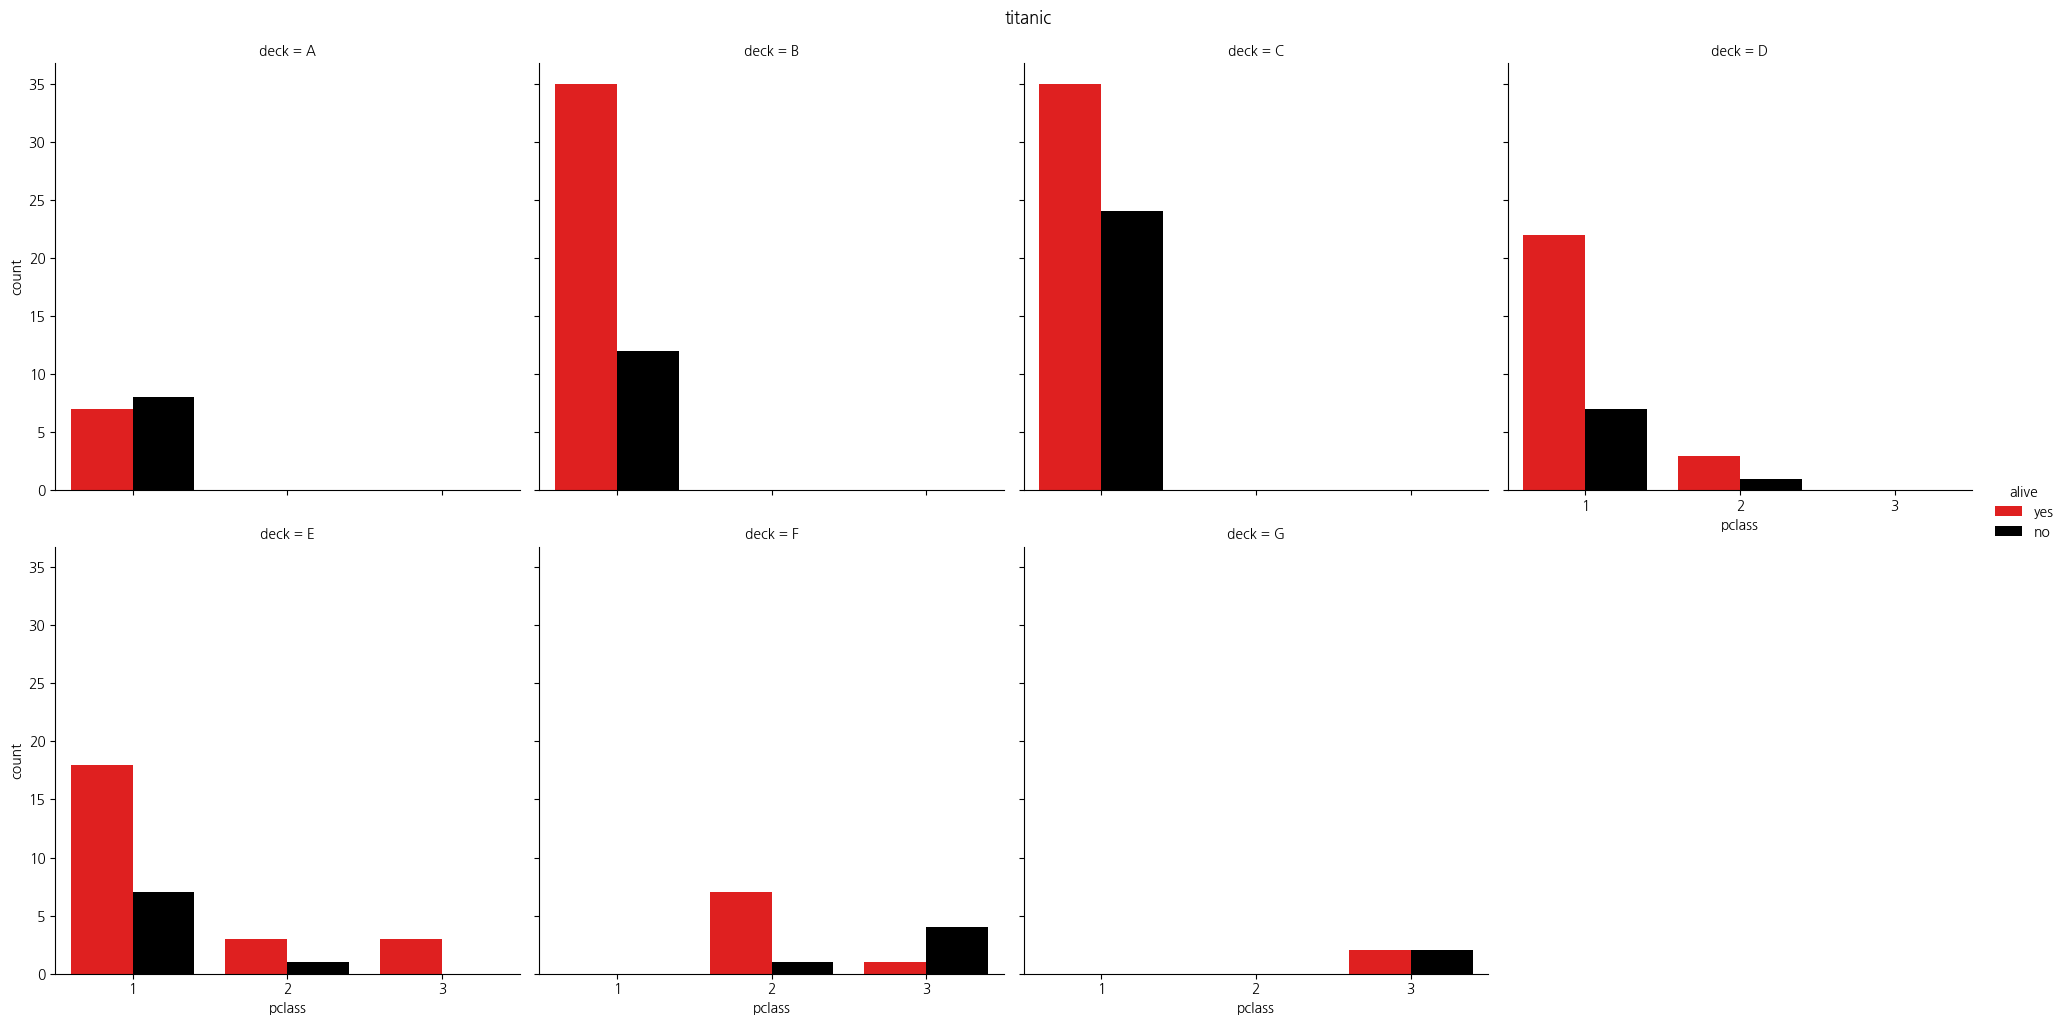

In [26]:
plt.figure(figsize=(14,7))
custom_palette = {'yes':'red', 'no':'black'}
sns.catplot(data=titanic, x='pclass', hue='alive', col='deck', kind='count', palette=custom_palette, col_wrap=4)
plt.suptitle('titanic', y=1.02)
plt.show()

### 3등급 생존

In [43]:
import pandas as pd
import seaborn as sns

# 타이타닉 데이터셋 로드
titanic = sns.load_dataset('titanic')

# 3등급 승객만 필터링
third_class_passengers = titanic[titanic['pclass'] == 3]

# 혼자 여행한 승객과 함께 여행한 승객 구분
alone_passengers = third_class_passengers[third_class_passengers['alone'] == True]
accompanied_passengers = third_class_passengers[third_class_passengers['alone'] == False]

# 혼자 여행한 승객과 함께 여행한 승객의 수
alone_count = len(alone_passengers)
accompanied_count = len(accompanied_passengers)

# 결과 출력
print("3등급 승객의 여행 방식 카운트:")
print(f"혼자 여행한 승객 수: {alone_count}명")
print(f"함께 여행한 승객 수: {accompanied_count}명")


3등급 승객의 여행 방식 카운트:
혼자 여행한 승객 수: 324명
함께 여행한 승객 수: 167명


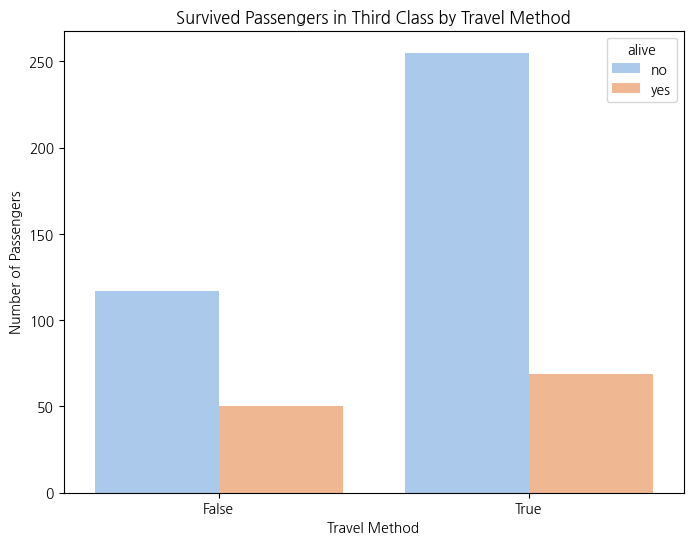

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3등급 승객만 필터링
third_class_passengers = titanic[titanic['pclass'] == 3]

# 그래프 설정
plt.figure(figsize=(8, 6))

# 그래프 그리기
sns.countplot(x='alone', hue='alive', data=third_class_passengers, palette='pastel')

# 그래프 제목과 라벨 설정
plt.title('Survived Passengers in Third Class by Travel Method')
plt.xlabel('Travel Method')
plt.ylabel('Number of Passengers')

# 그래프 출력
plt.show()
